# РК1 Кузнецов ИУ5-21М (Вариант 9)

# Условия задач


### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

In [32]:
from google.colab import drive
drive.mount('/content/drive')

drive_path = '/content/drive/My Drive/'
data = pd.read_csv('/content/drive/My Drive/auto.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Первичный анализ данных

Выведем первые 5 строк датасета:

In [33]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Определим размер датасета:

In [34]:
data.shape

(398, 9)

In [35]:
data.dtypes

,0
name,object
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object


Проверим наличие пропусков:

In [36]:
data.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


### Задача № 9

Удалим колонки, содержащие пустые значения:

In [37]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((398, 9), (398, 8))

Выведем первые строки датасета на экран:

In [38]:
data_new_1

,name,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,2625,18.6,82,usa


Удалим строки, содержащие пустые значения:

In [39]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((398, 9), (392, 9))

In [40]:
data_new_2.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Найдем значение квантиля для заполнения пропущенных значений:

In [45]:
# quantile_value = data_new_3['horsepower'].quantile(0.95)
data_new_3 = data
quantile_value = data_new_3['horsepower'].quantile(0.95)

Замена пропущенных значений на значение из хвоста распределения:

In [46]:
data_new_3['horsepower'] = data_new_3['horsepower'].fillna(quantile_value)

Выведем на экран:

In [47]:
data_new_3.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [48]:
data_new_3.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0


### Задача № 29

Выведем первые 20 строк:

In [49]:
data.head(20)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


Анализ константных и псевдоконстантных признаков:

In [50]:
constant_features = [feat for feat in data.columns if data[feat].nunique() == 1]
pseudo_constant_features = [feat for feat in data.columns if data[feat].value_counts(normalize=True).values[0] > 0.99]

Удаление константных и псевдоконстантных признаков:

In [51]:
data.drop(columns=constant_features + pseudo_constant_features, inplace=True)

Выведем полученный результат:

In [52]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Диаграмма рассеяния:

<Axes: xlabel='displacement', ylabel='weight'>

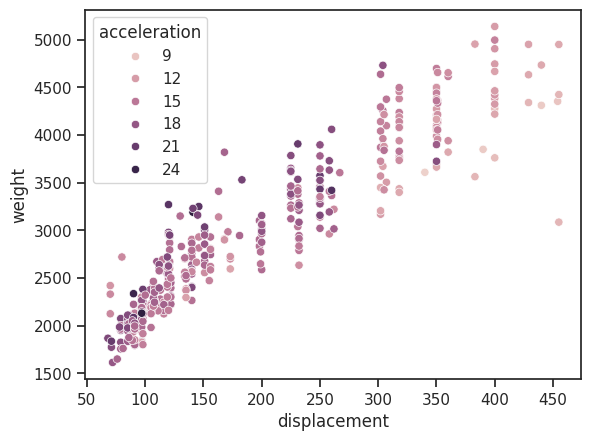

In [58]:
sns.scatterplot(
    data=data,
    y="weight",
    x="displacement",
    hue="acceleration"
)